# Técnicas Supervisionadas de Regressão

    Profa. Adelaide Alves 

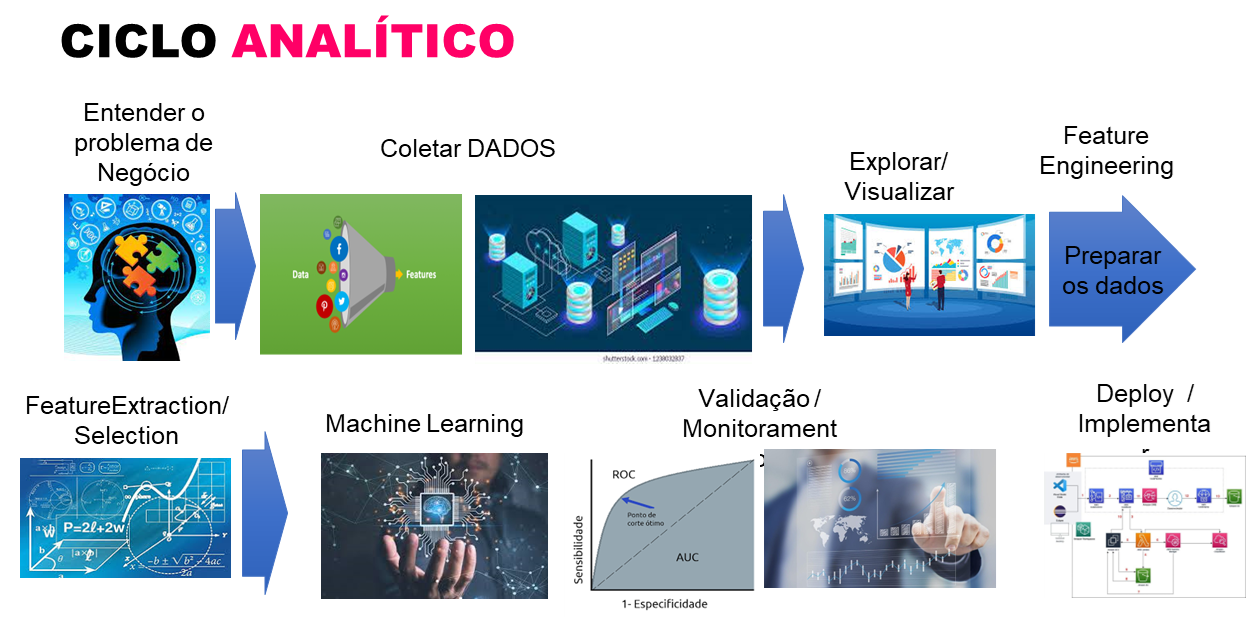

# Qual é o nosso desafio?

Dataset Bike Sharing

Descrição: Os sistemas de compartilhamento de bicicletas são uma nova geração de aluguel de bicicletas tradicional, onde todo o processo de associação, locação e devolução tornou-se automático. Através destes sistemas, o usuário pode facilmente alugar uma bicicleta a partir de uma determinada posição e retornar em outra posição. Atualmente, existem cerca de 500 programas de compartilhamento de bicicletas em todo o mundo, compostos por mais de 500 mil bicicletas. Hoje, existe um grande interesse nesses sistemas devido ao seu importante papel no trânsito, questões ambientais e de saúde.

Fonte de dados: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


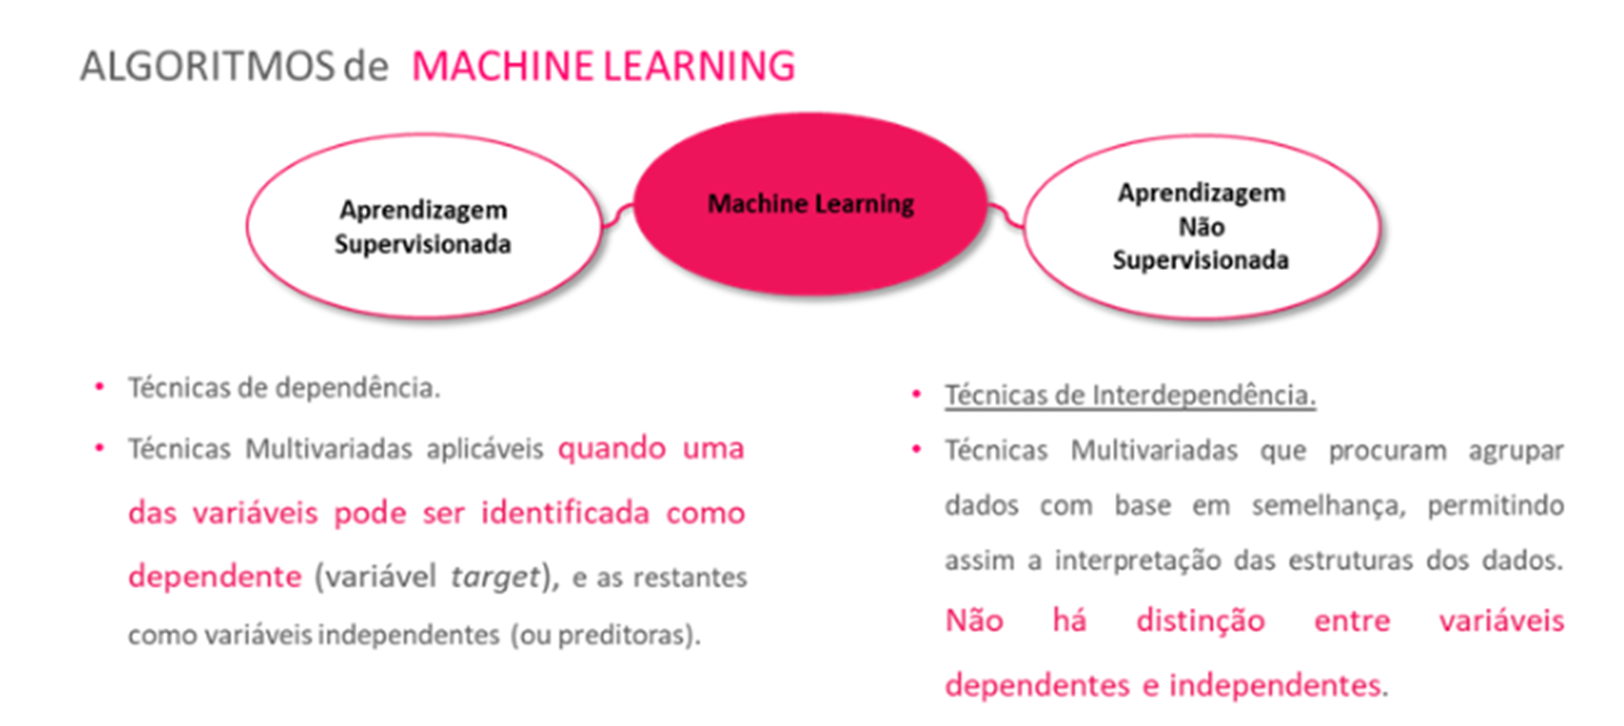

#

### Voltando ao nosso desafio.....................................

#

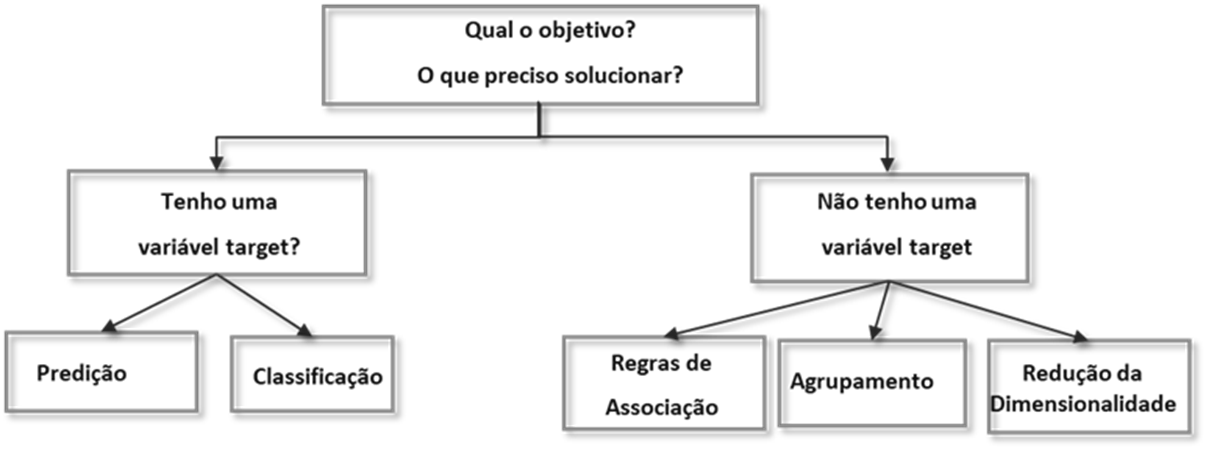

Dicionário de variáveis:
- instant: ID
- dteday: ID
- season: (1:winter, 2=springer, 3:summer, 4:fall)
- yr: year (0: 2011, 1:2012)
- mnth: ( 1 to 12)
- holiday (0=no;1=yes)
- weekday (day of the week)
- workingday (0=no;1=yes) 
- weathersit (1: Clear, Few clouds , Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, 
              Mist + Few clouds, Mist;3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + 
              Scattered clouds;4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) 
- temp (Normalized temperature in Celsius). The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, 
        t_max=+39 (only in hourly scale)
- atemp (Normalized feeling temperature in Celsius). The values are derived via (t-t_min)/(t_max-t_min),
   t_min=-16, t_max=+50 (only in hourly scale)
- hum (Normalized humidity_. The values are divided to 100 (max)
- windspeed	Normalized wind speed. The values are divided to 67 (max)
- casual (count of casual users)
- registered (count of registered users) 
- cnt (count of total rental bikes including both casual and registered)


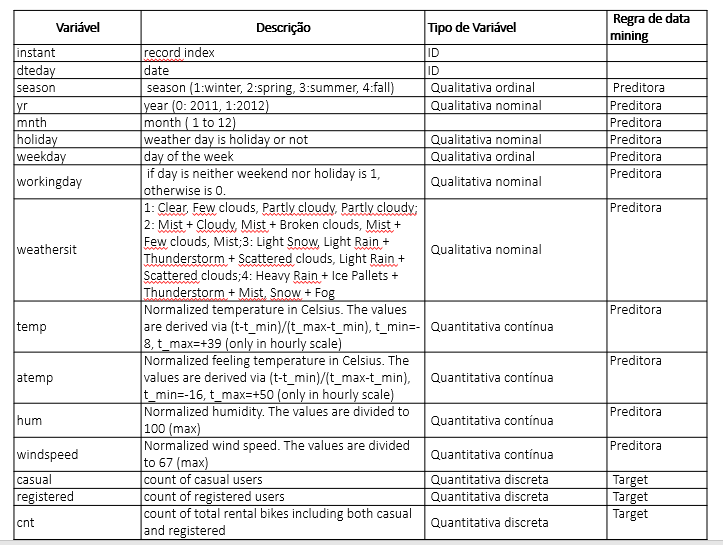



In [1]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import statsmodels.api as sm



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Importar a base de dados 
df=pd.read_csv(r'Bike_Sharing.csv')

In [5]:
# Visualizar os dados
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [ ]:
# Verificar os formatos das variáveis
df.info()

In [ ]:
# Análise descritiva
df.describe().round(2).T

In [ ]:
# Pre-processing
# Mudar o formato da variável quantitativa em qualitativa
df['season']= df['season'].astype(str)
df['yr']= df['yr'].astype(str)
df['holiday']= df['holiday'].astype(str)
df['weekday']= df['weekday'].astype(str)
df['workingday']= df['workingday'].astype(str)
df['weathersit']= df['weathersit'].astype(str)
df['mnth']= df['mnth'].astype(str)


In [ ]:
df.info()

In [ ]:
df.describe().round(2)

In [ ]:
# modificando os nomes das colunas
df.columns = ['ID', 'data', 'estacao','ano','mes', 'feriado','dia_semana','dia_util','clima', 'temperatura','sensacao_termica',
             'umidade','vel_vento','casual', 'registrada', 'total']

In [ ]:
# Verificar os nomes das variáveis
# informações dos dados
df.info()

In [ ]:
# Histograma da Variável target / Variável Dependente / Supervisionar

plt.hist(df['total'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('total')
plt.title('Histograma Quantidade de bikes');



In [ ]:
sns.boxplot(x='total', data=df);

In [ ]:
# Selecionar as variáveis quantitativas
var_num = ['temperatura','sensacao_termica','umidade','vel_vento', 'total']

In [ ]:
# Selecionar as variáveis qualitativas
var_cat =['estacao','ano','mes', 'feriado','dia_semana','dia_util','clima']

In [ ]:
# Análise descritiva: medidas resumo
df[var_num].describe().round(2)

In [ ]:
# Análise exploratória dos dados usando o gráfico histograma
# Análise exploratória dos dados
features = var_num
fig,axs=plt.subplots(nrows=2, ncols=3, figsize=(18,10))
for col, ax in zip(features[0:], axs.ravel()):
    x=df.loc[:, col]
    sns.distplot(x, ax=ax, color="blue", kde=False)
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4);

In [ ]:
# Análise exploratória dos dados usando o gráfico Box Plot
# Análise exploratória dos dados
plt.figure(figsize=(24,20))

features = var_num
plt.subplot(4, 2, 1)
fig = df.boxplot(column='total')
fig.set_title('')
fig.set_ylabel('Quantidade de bikes alugadas')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='temperatura')
fig.set_title('')
fig.set_ylabel('Temperatura')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='sensacao_termica')
fig.set_title('')
fig.set_ylabel('sensacao_termica')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='umidade')
fig.set_title('')
fig.set_ylabel('umidade')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='vel_vento')
fig.set_title('')
fig.set_ylabel('vel_vento')   


####  Em uma análise descritiva sempre utilizar a variável Target que nesse caso é uma variável numérica quantitativa
          ==> gráfico quando a variável preditora quantitativa 
          ==> avaliar essa associação com análise de correlação


In [ ]:
# Gráfico de dispersão entre total e temperatura
sns.jointplot(x='temperatura', y='total', data=df, kind='scatter')

In [ ]:
# Análise exploratória dos dados
#sns.pairplot()
sns.pairplot(df[var_num]);

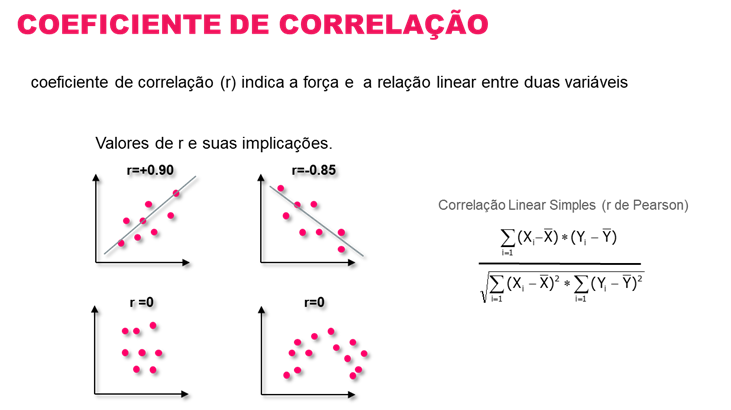

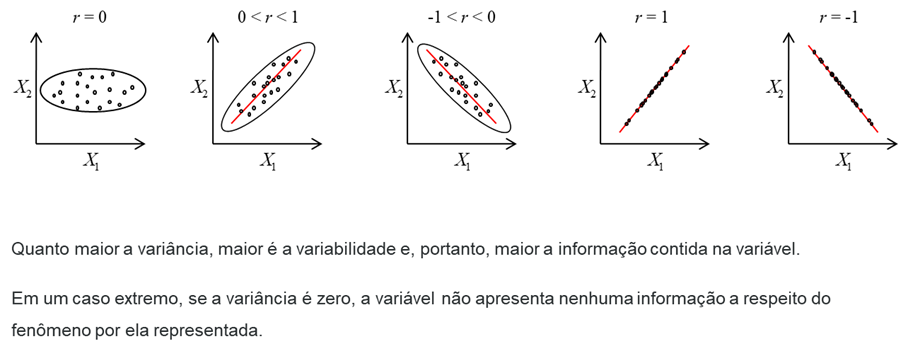

### Correlação de Pearson

#### Teste de hipótese
#### H0: correlação = 0  
#### H1: correlação <> 0

#### erro decisão: 0,05 ou 5% --> nível de significância do teste de hipótese
#### Critério de decisão:
#### p-valor < critério de decisão --> rejeito H0
#### p-valor < critério de decisão --> não rejeito H0

#### conclusão: p-valor < 0,05 --> logo existe correlação entre as duas variáveis

In [ ]:
# Correlação de Pearson entre total e temperatura
corr = pearsonr(df['total'], df['temperatura'])
corr

In [ ]:
#  Correlação de Pearson entre entre total e umidade
corr = pearsonr(df['total'], df['umidade'])
corr

In [ ]:
# Correlação de Pearson entre todas as variáveis quantitativas
df[var_num].corr(method='pearson')


In [ ]:
# Matriz de correlação

sns.heatmap(df[var_num].corr(), cmap='coolwarm', annot = True)

## E quando as váriáveis são categóricas 

## Análise bivariada

In [ ]:

# Identificar se há associação entre CNT ( variável quantitativa) e Estação do ano (variável qualitativa)
# estação do ano   1 = winter , 2 = spring, 3 = summer, 4 = fall,
# Box Plot
sns.boxplot(x='estacao', y='total', data=df, palette = 'rainbow')

In [ ]:
# Teste qui-quadrado é utilizado para descobrir associação entre duas variáveis qualitativas


#### TESTE QUI-QUADRADO (Independência)
    Distribuições bivariadas de frequências para variáveis qualitativas são apresentadas em tabelas de contingência,
    que facilitam a análise estatística da possível relação entre duas características observadas em determinada população. 
    A estatística chamada qui-quadrado sintetiza as diferenças entre as frequências observadas de uma tabela bivariada e 
    as correspondentes frequências esperadas. 
    Definindo as hipóteses H0 e H1
    H0: as variáveis são independentes
    H1: as variáveis não são independentes, isto é, apresentam algum grau de associação entre si.


In [ ]:
sns.boxplot(x='total', data=df);

In [ ]:
# transformar a variável total de bikes alugadas em qualitativa
# --> faixa cnt (qualitativa ordinal) vs estação do ano (qualitativa ordinal)
# criar a faixa_cnt por quartis 
# 
Q1 =  np.percentile(df['total'], 25)
Q2 =  np.percentile(df['total'], 50)
Q3 =  np.percentile(df['total'], 75)
maximo = max(df['total'])    
minimo = min(df['total']) 
print(minimo, Q1, Q2, Q3, maximo)

In [ ]:
df.loc[(df.total >= 0) & (df.total <= Q1), 'fx_total']='22 a 3152'
df.loc[(df.total > Q1) & (df.total <= Q2),  'fx_total']='3152 a 4548'
df.loc[(df.total >  Q2)  & (df.total <=Q3),  'fx_total']='4548 a 5956'
df.loc[(df.total >  Q3) & (df.total <= maximo),  'fx_total']='5956 a 8714'

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
# Tabelas bivariadas entre as variáveis preditoras categoricas e a variável target categórica

In [ ]:
pd.crosstab(df.fx_total,df.estacao, margins=True)

In [ ]:
!pip install researchpy
import researchpy

In [ ]:
# Análise sobre a variável preditora estação do ano  1 = spring, 2 = summer, 3 = fall, 4 = winter 

results = researchpy.crosstab(df['fx_total'],df['estacao'], test='chi-square')
results

In [ ]:
sns.boxplot(x='mes', y='total', data=df, palette = 'rainbow');

In [ ]:
# Análise sobre a variável preditora mês do ano

results = researchpy.crosstab(df['fx_total'],df['mes'], test='chi-square')
results 

In [ ]:
# Box Plot  Clima: weathersit
# (1: Clear, Few clouds , Partly cloudy, Partly cloudy;
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist;
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds;
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).
sns.boxplot(x='clima', y='total', data=df, palette = 'rainbow');

In [ ]:
results = researchpy.crosstab(df['fx_total'],df['clima'], test='chi-square')
results

In [ ]:
# Box Plot: Dia da semana
sns.boxplot(x='dia_semana', y='total', data=df, palette = 'rainbow');

In [ ]:
results = researchpy.crosstab(df['fx_total'],df['dia_semana'], test='chi-square')
results

In [ ]:
# Box Plot  Feriado
sns.boxplot(x='feriado', y='total', data=df, palette = 'rainbow');

In [ ]:
results = researchpy.crosstab(df['fx_total'],df['feriado'], test='chi-square')
results

In [ ]:
# Box Plot
sns.boxplot(x='dia_util', y='total', data=df, palette = 'rainbow');

In [ ]:
results = researchpy.crosstab(df['fx_total'],df['dia_util'], test='chi-square')
results

     Feature Engineering: preparando dados para aprendizado de máquina
     Feature engineering não se trata apenas de selecionar boas features para um modelo preditivo.
     Esse processo também abrange a transformação matemática nas features existentes para extrair o 
     máximo potencial dos dados e criação de novas features
     Exemplo: Transformação de features, dados faltantes, manipulação de outliers entre outros

In [ ]:
df.info()

Alguns algoritmos têm dificuldade em entender variáveis que possuem mais de uma categoria. Acham que é uma variável contínua (0, 1, 2, 3...) que realmente tem significado contínuo. A solução é transformar todas as categorias em uma variável diferente de valores 0 e 1, chamada de one-hot encoding (n categorias definir n variáveis). 	
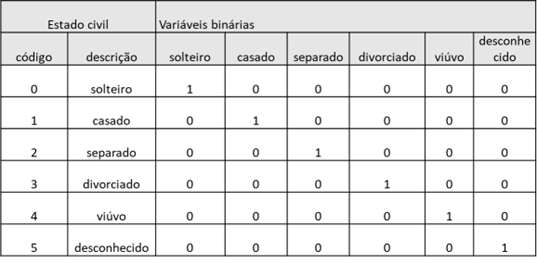

In [ ]:
var_cat

In [ ]:
# Criar variáveis dummies para cada variável qualitativa e excluir a primeira categoria de cada variável
var_dummies = pd.get_dummies(df[var_cat], drop_first = True ,dtype=float)
print(var_dummies)



#### Levando as variáveis categorias transformadas em dummies para a base de dados

     concatenando a base original e a base de dummies

In [ ]:
df = pd.concat([df, var_dummies], axis=1)

print(df.head())

In [ ]:
df.info()

In [ ]:
# excluindo as colunas que não precisaremos mais

df1  = df.copy()

df1= df1.drop(['ID', 'data','ano','mes', 'feriado', 'dia_util','estacao', 'dia_semana','clima', 
                       'casual', 'registrada','fx_total'], axis=1)



# Técnicas Supervisionadas com variável target quantitativa

    Alguns exemplos de Algoritmos:
    Regressão Linear, Árvore de Regressão, RandomForest, XGBoost, KNN, SVM, NaiveBayes, entre outros

In [ ]:
df1.info()

In [ ]:
df1.head().T

# Modelo 1: Regressão Linear

### Modelo de Regressão Linear Múltipla

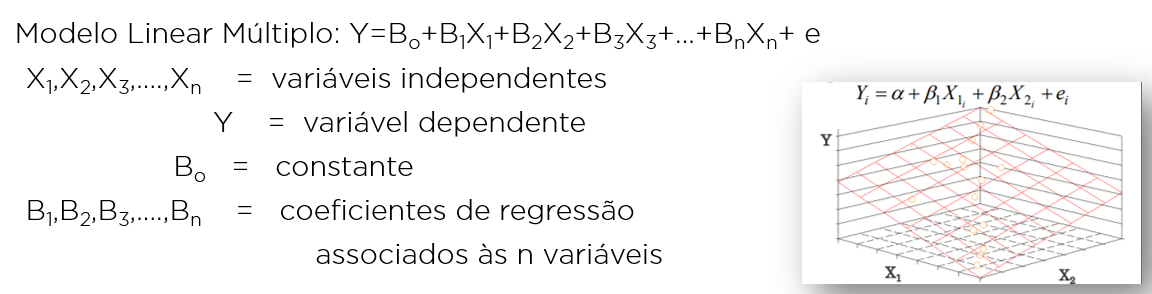

In [ ]:
# Selecionar as variáveis preditoras e a resposta do modelo
# Selecionar as variáveis preditoras e a resposta do modelo

X = df1.drop(['total'], axis=1)
y = df1['total']

In [ ]:
X

In [ ]:
y

In [ ]:
# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.

# Importar as bibliotecas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 17)

In [ ]:
# importar bibliotecas
import statsmodels.api as sm
from scipy import stats

In [ ]:

X_train.info()

In [ ]:
# descritivo das variáveis: medidas resumo
X_train.describe().round(2) 

In [ ]:
#Modelo de regressão linear múltipla
# regression.linear_model.OLS Ordinary Least Squares
# constante do modelo (intercepto)

X_ = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, X_).fit()
#results = model.fit()
print(model_1.summary())


In [ ]:
X_

In [ ]:
# Modelo Regressão Linear Múltipla
# TotalEstimado = 1519.77 + 3067.85 * temperatura + 1786.16* sensacao_termica +....71 * estacao_2 + ...

### Etapas de Escolha de Modelos 

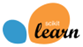   
 



    O scikit-learn é uma biblioteca da linguagem Python desenvolvida especificamente para aplicação prática de machine learning.
    Esta biblioteca dispõe de ferramentas simples e eficientes para análise preditiva de dados, é reutilizável em diferentes situações, possui código aberto, sendo acessível a todos e foi construída sobre os pacotes NumPy, SciPy e matplotilib.
    Uma das melhores opções para aplicação prática de machine learning é através da linguagem Python.
    Um dos fatores que trás destaque a linguagem são justamente suas bibliotecas e pacotes, que proporcionam muita simplicidade as aplicações, além de garantir scripts descomplicados e eficientes. Dentre estes pacotes, temos o NumPy e o Pandas como os principais para a preparação dos dados, e o scikit-learn, ou apenas sklearn, sendo o mais utilizado para efetiva criação de modelos de machine learning.
    Principais aplicações
    O sklearn está organizado em muitos módulos, cada um desenvolvido para uma finalidade específica. Nestes módulos encontraremos funções para as mais diferentes aplicações.
    Analisando estas diferentes aplicações entenderemos a organização da biblioteca, e como encontrar o que buscamos.
    •	Pré-processamento – normalmente esta é a etapa mais trabalhosa no desenvolvimento de um modelo de machine learning. Como já vimos, o NumPy e o Pandas são largamente utilizados nesta etapa, mas também teremos funções para esta finalidade no sklearn, pensadas especialmente para tratamento de dados que alimentarão algoritmos de machine learning.
    •	Classificação – desenvolvimento de modelos capazes de detectar a qual categoria pré-determinada um elemento pertence. Podemos identificar se um aluno foi reprovado ou aprovado, se uma pessoa possui ou não determinada doença, ou ainda qual doença uma pessoa pode ter dentre várias possíveis, dentre muitas outras possibilidades.
    •	Regressão – desenvolvimento de modelos que podem atribuir um valor contínuo a um elemento. Podemos prever o preço de um imóvel, altura de uma pessoa, quantidade de vendas de um produto, e assim por diante.
    •	Clusterização – desenvolvimento de modelos para detecção automática de grupos com características similares em seus integrantes. Podemos identificar clientes com comportamentos parecidos, grupos de risco de determinada doença, verificar padrões entre moradores de uma cidade, e muitos outros agrupamentos.
    •	Redução de dimensionalidade – reduzir o número de variáveis em um problema. Com esta redução podemos diminuir consideravelmente a quantidade de cálculos necessários em um modelo, aumentando a eficiência, com uma perde mínima de assertividade.
    •	Ajuste de parâmetros – comparar, validar e escolher parâmetros e modelos, de maneira automatizada. Podemos facilmente comparar diferentes parâmetros no ajuste de um modelo, encontrando assim a melhor configuração para a aplicação em questão.

### Dividir a amostra em treino e validação

In [ ]:
# Importar as bibliotecas
from sklearn.model_selection import train_test_split


In [ ]:
# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 17)

In [ ]:
X_train

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Regressão linear múltipla
from sklearn.linear_model import LinearRegression


#Criando um Objeto de Regressão Linear
lm = LinearRegression()



In [ ]:
#Treinando o Modelo
lm.fit(X_train, y_train)

In [ ]:
# Intercepto do modelo (b0)
print(lm.intercept_)

In [ ]:
# Os coeficientes do modelo (b1,b2,b3....)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df.round(3)

#### Avaliação de Desempenho dos modelos

### Medidas de erro

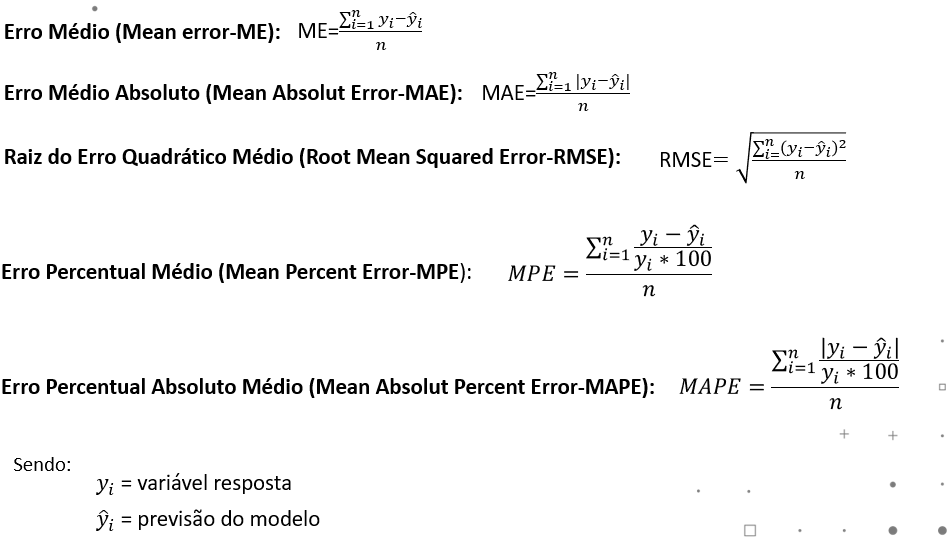

In [ ]:
# Importar a biblioteca
# Medidas de erro
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#Verificando o resultado
r_sq = lm.score(X_test, y_test)
print('Coeficiente de Determinação (R²):', r_sq)

In [ ]:
# Calculando o valor predito da variável resposta na amostra  teste
y_test_reglin  = lm.predict(X_test)

In [ ]:
y_test_reglin

In [ ]:
# Medidas de erro na amostra teste
me1   = round((y_test-y_test_reglin).mean(),2)
mae1  = round((mean_absolute_error(y_test, y_test_reglin)),2)
mse1  = round((mean_squared_error(y_test, y_test_reglin)),2)
rmse1  =round( (np.sqrt(mean_squared_error(y_test, y_test_reglin))),2)
mpe1  = round(((y_test - y_test_reglin)/y_test).mean(),2)
mape1  =  round((mae1/y_test).mean(),2) 


In [ ]:
list1 = [me1, mae1,mse1,rmse1,mpe1, mape1]
list1

# Modelo 2: Árvore de Regressão

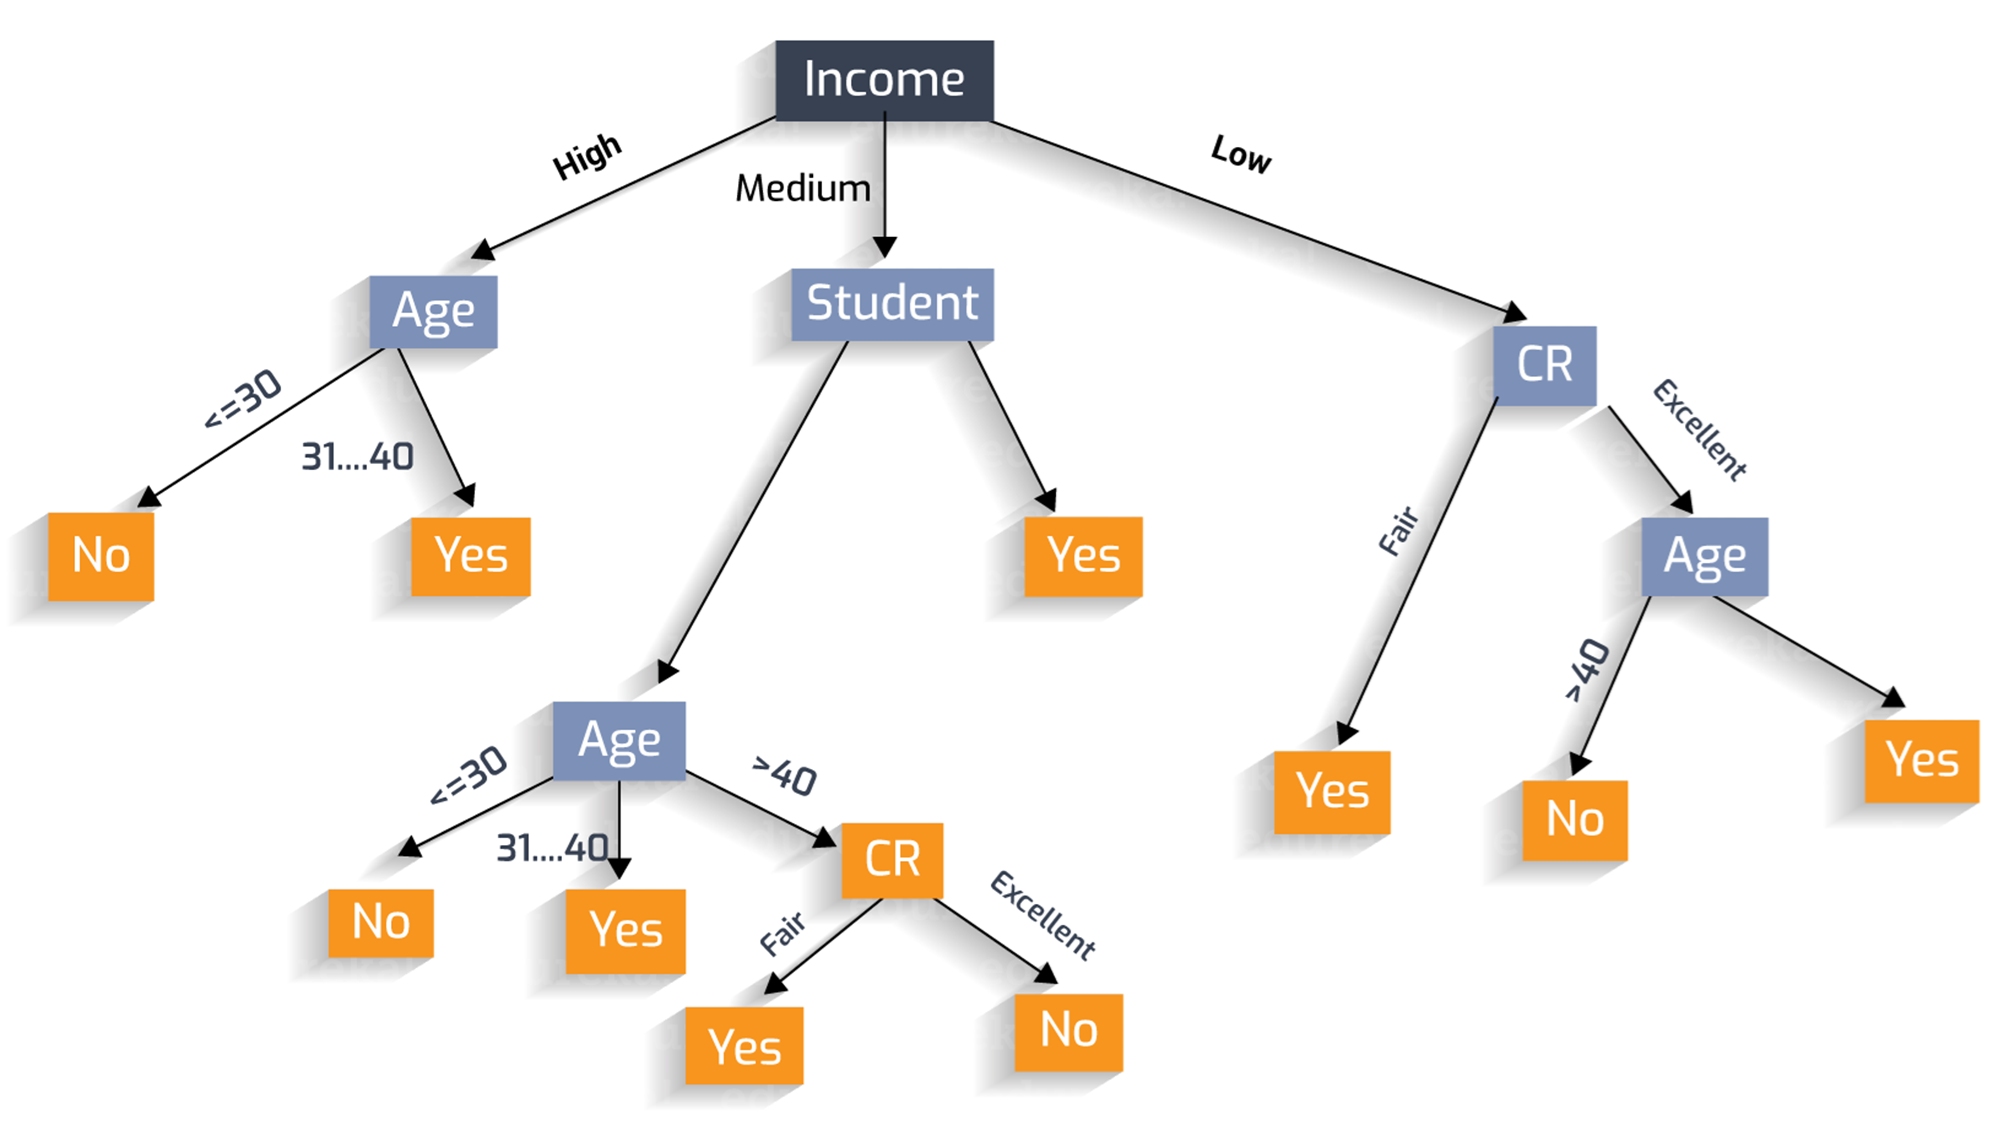

In [ ]:
# Import the necessary modules and libraries

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


In [ ]:
# Fit regression model
model_2 = DecisionTreeRegressor(max_depth=4,min_samples_split=50,random_state=17,criterion='squared_error')

In [ ]:

cols = X_train.columns


In [ ]:
cols

In [ ]:
# Treinando o modelo de arvore de decisão:

model_2.fit(X_train, y_train)

In [ ]:
input_features=['temperatura', 'sensacao_termica', 'umidade', 'vel_vento', 'estacao_2',
       'estacao_3', 'estacao_4', 'ano_1', 'mes_10', 'mes_11', 'mes_12',
       'mes_2', 'mes_3', 'mes_4', 'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9',
       'feriado_1', 'dia_semana_1', 'dia_semana_2', 'dia_semana_3',
       'dia_semana_4', 'dia_semana_5', 'dia_semana_6', 'dia_util_1', 'clima_2',
       'clima_3']
fig = plt.figure(figsize=(18,12))
plot_tree(model_2, fontsize=8,filled=True, feature_names=input_features )



In [ ]:
for caracteristica, score in zip(X_train, model_2.feature_importances_):
  print('caracteristica {} e Importância {}'.format(caracteristica, score*100))

In [ ]:
# Aplicando o algoritmo na base teste

y_test_regtree  = model_2.predict(X_test)

In [ ]:
y_test_regtree

In [ ]:

# Medidas de erro na amostra teste
me2   = round((y_test-y_test_regtree).mean(),2)
mae2  = round((mean_absolute_error(y_test, y_test_regtree)),2)
mse2  = round((mean_squared_error(y_test, y_test_regtree)),2)
rmse2  = round( (np.sqrt(mean_squared_error(y_test, y_test_regtree))),2)
mpe2  = round(((y_test - y_test_regtree)/y_test_regtree).mean(),2)
mape2  =  round((mae2/y_test).mean(),2) 

In [ ]:
list2 = [me2, mae2,mse2,rmse2,mpe2, mape2]
list2

In [ ]:

pd.DataFrame({"Regressão Linear":list1, "Árvore de Regressão": list2})

In [ ]:
## Conclusão dos resultados dos modelos
